In [1]:
# imports
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Set our train and test data

test_df = pd.read_csv("/content/drive/MyDrive/Minor Project/mnist_test.csv")
train_df = pd.read_csv("/content/drive/MyDrive/Minor Project/mnist_train.csv")

In [4]:
train_df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_df.shape

(60000, 785)

In [6]:
train_df.isnull().sum()

label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64

In [7]:
train_df.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [8]:
test_df.shape

(10000, 785)

In [9]:
# show digits distribution
train_df.label.value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64

In [10]:
# Set features and label for showing
digits = train_df.drop(['label'], 1).values
digits = digits / 255.
label = train_df['label'].values

digits.max(), label.max()

<ipython-input-10-3d4a11590d9e>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  digits = train_df.drop(['label'], 1).values


(1.0, 9)

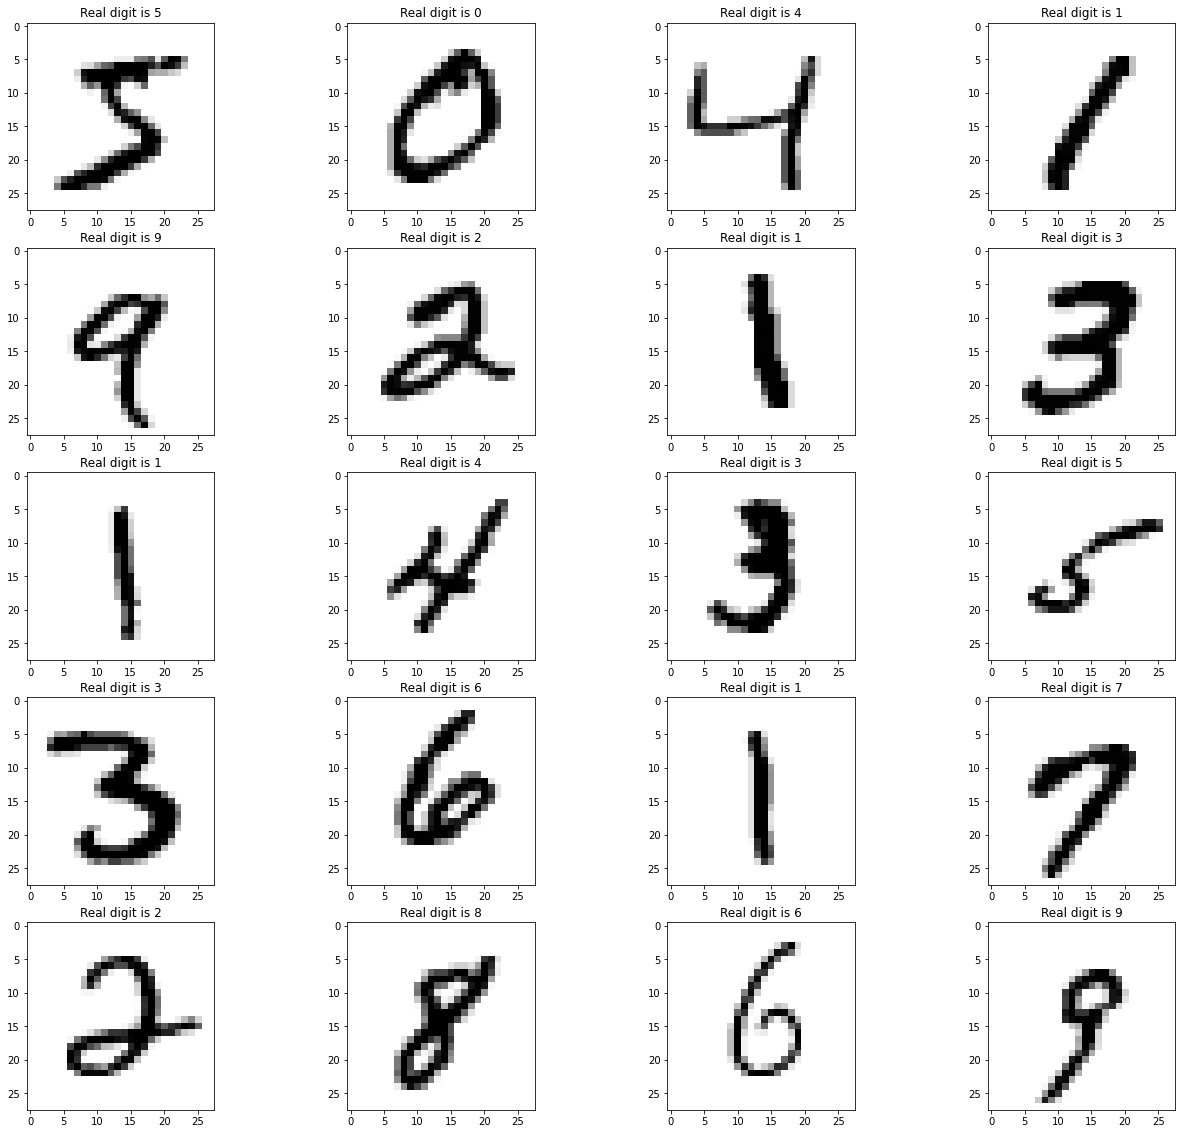

In [11]:
# Show 25 digits of data
fig, axis = plt.subplots(5, 4, figsize=(22, 20))

for i, ax in enumerate(axis.flat):
    ax.imshow(digits[i].reshape(28, 28), cmap='binary')
    ax.set(title = "Real digit is {}".format(label[i]))

In [12]:
# models
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

In [13]:
# Set X, y for fiting
X = digits
y = label

# split data into 90% training and 10% for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [22]:
# Seting our model
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [23]:
y_pred = model.predict(X_test) 

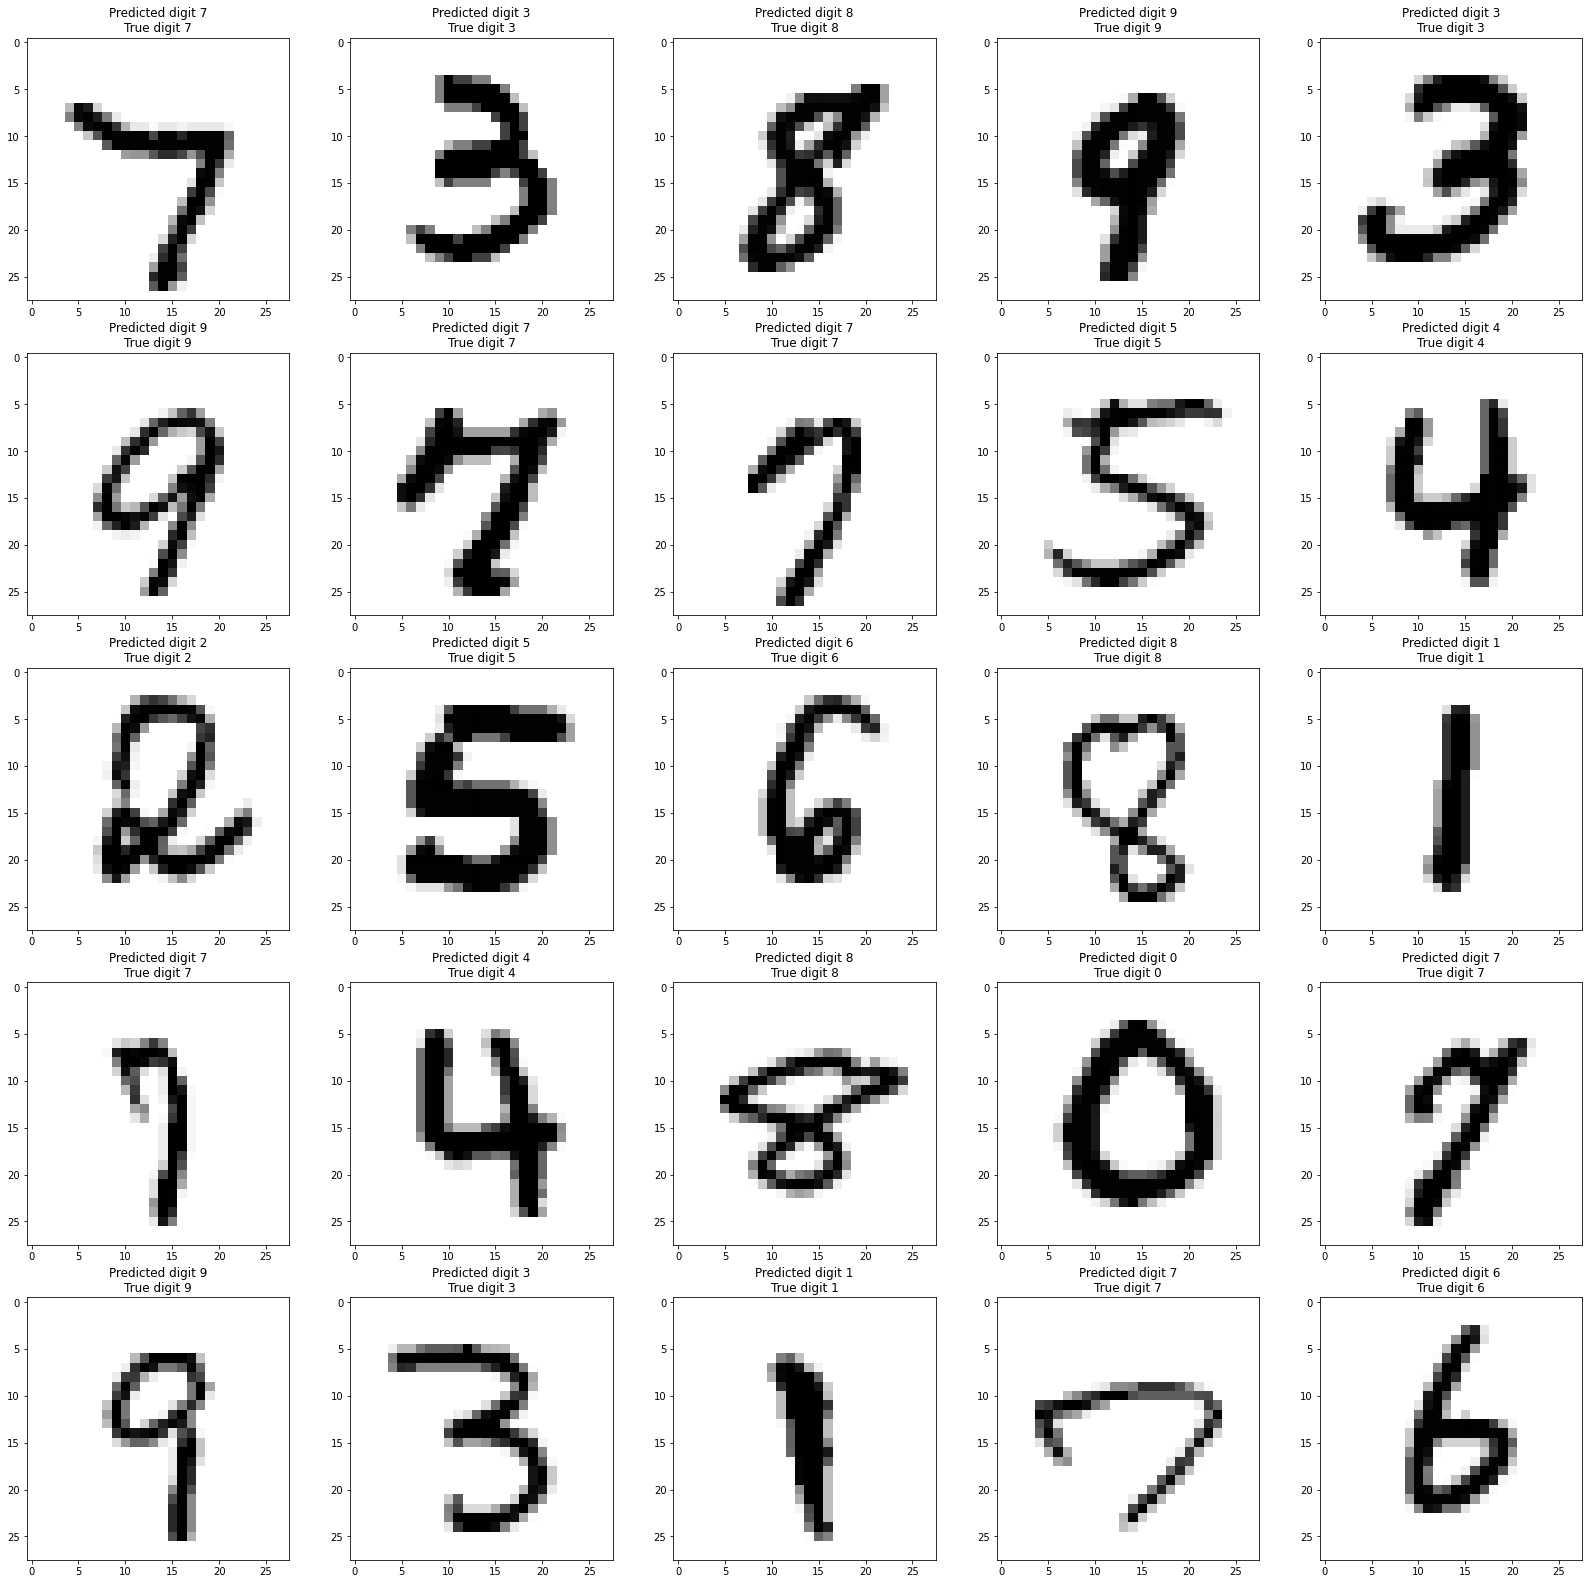

In [24]:
# Compare our result
fig, axis = plt.subplots(5, 5, figsize=(28, 28))

for i, ax in enumerate(axis.flat):
    ax.imshow(X_test[i].reshape(28, 28), cmap='binary')
    ax.set(title = "Predicted digit {0}\nTrue digit {1}".format(y_pred[i], y_test[i]))

In [25]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([624, 654, 572, 589, 580, 551, 580, 633, 585, 632]))

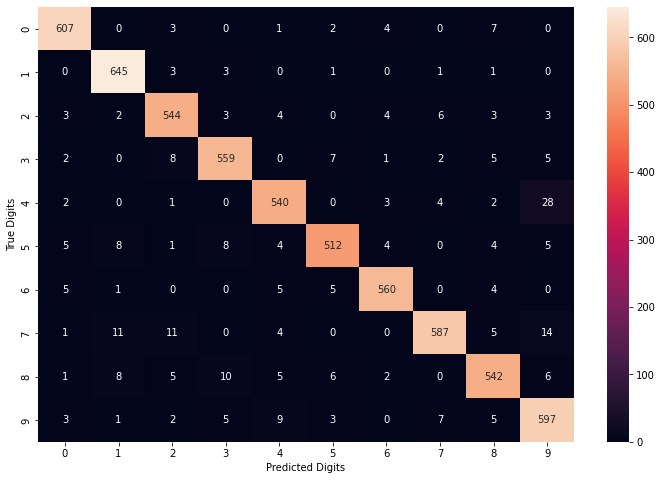

In [26]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       624
           1       0.95      0.99      0.97       654
           2       0.94      0.95      0.95       572
           3       0.95      0.95      0.95       589
           4       0.94      0.93      0.94       580
           5       0.96      0.93      0.94       551
           6       0.97      0.97      0.97       580
           7       0.97      0.93      0.95       633
           8       0.94      0.93      0.93       585
           9       0.91      0.94      0.93       632

    accuracy                           0.95      6000
   macro avg       0.95      0.95      0.95      6000
weighted avg       0.95      0.95      0.95      6000



In [28]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, r2_score, mean_absolute_error, mean_squared_error
# Display accuracy score
rf_acc = accuracy_score(y_test, y_pred)
print("Model accuracy is: {0:.3f}%".format(rf_acc * 100))

# Display F1 score
print("f1 score :" + str(f1_score(y_test, y_pred ,labels=None, pos_label=1, average='weighted', sample_weight=None)))

#Display recall score
print("recall score :"+ str(recall_score(y_test, y_pred, labels=None, pos_label=1, average='weighted', sample_weight=None)))

#Display precision score
print("precision score:"+ str(precision_score(y_test,  y_pred, labels=None, pos_label=1, average='weighted', sample_weight=None)))

#Display r2 score
print("r2 score:"+ str(r2_score(y_test, y_pred, sample_weight=None)))

#Display mean absolute error
print("mean absolute error:" + str(mean_absolute_error(y_test, y_pred, sample_weight=None)))

#Display mean squared error
print("mean squared error:" + str(mean_squared_error(y_test, y_pred, sample_weight=None)))

#Display root mean squared error
print("root mean squared error:" + str(mean_squared_error(y_test, y_pred, squared=False)))


Model accuracy is: 94.883%
f1 score :0.9488109295141268
recall score :0.9488333333333333
precision score:0.9490705960008166
r2 score:0.8842422716022407
mean absolute error:0.199
mean squared error:0.985
root mean squared error:0.9924716620639604
